## EDA

### Импорт

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# импортируем данные
df = pd.read_csv(r"C:\Users\allek\OneDrive\Рабочий стол\summer_train\git_project\Diabetes-ML-From-Scratch\raw_data\diabetes.csv")

### Ознакомление с данными

In [3]:
print(df.shape)
display(df.head())

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# глянем на статистику
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Можно заметить, что в некоторых полях минимальное значение равно 0, но при этом такого быть не может

In [5]:
# Столбцы, где 0 является невозможным значением
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Посчитаем количество нулей в этих столбцах
(df[zero_columns] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Влияние данных на диабет, поиск выбросов

In [6]:
# глянем на информацию по группировке больных и здоровых
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


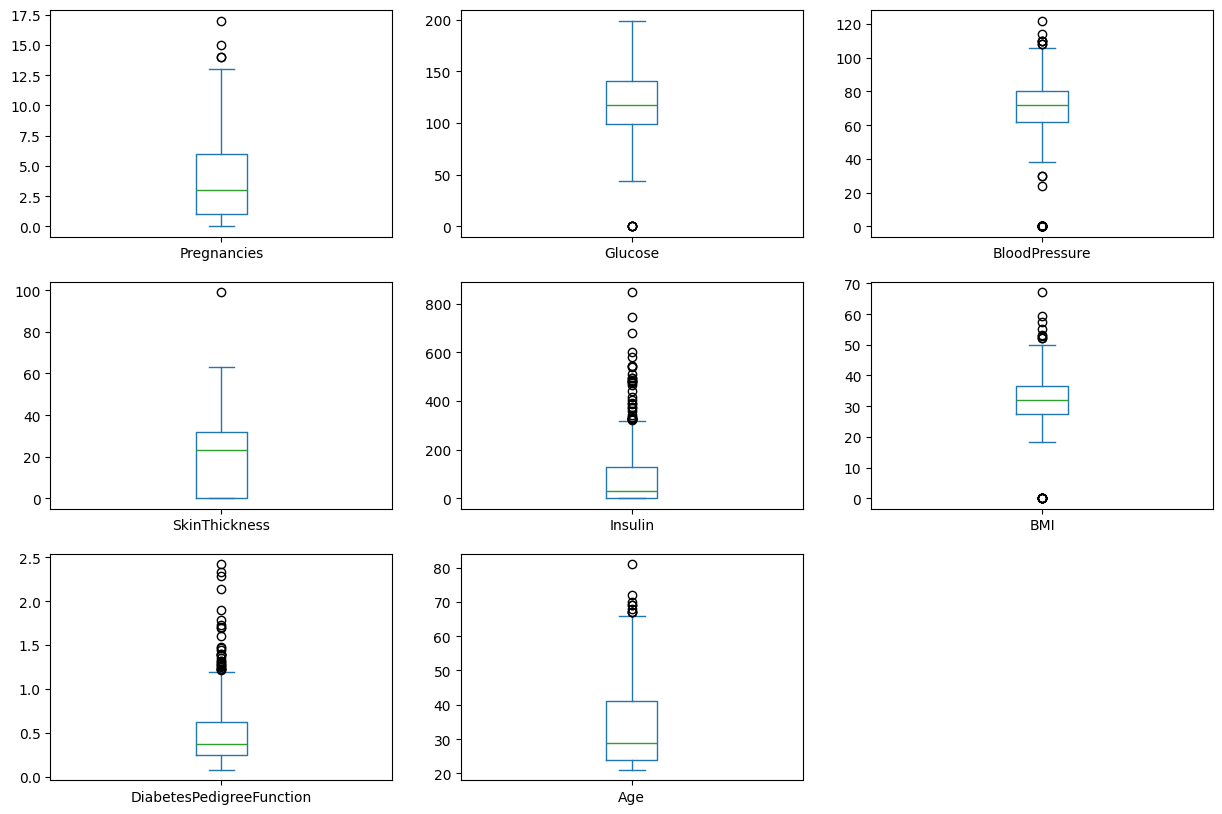

In [7]:
# Построим boxplot для всех признаков
df.drop('Outcome', axis=1).plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.show()

In [8]:
# заменим нулевые значения(пропуски)
df['Glucose'] = np.where(df['Glucose'] == 0, df['Glucose'].mean(), df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure'] == 0, df['BloodPressure'].mean(), df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness'] == 0, df['SkinThickness'].mean(), df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin'] == 0, df['Insulin'].mean(), df['Insulin'])
df['BMI'] = np.where(df['BMI'] == 0, df['BMI'].mean(), df['BMI'])

In [9]:
# глянем на информацию по группировке больных и здоровых
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


BloodPressure можно попробовать убрать, будто влияние очень малое.

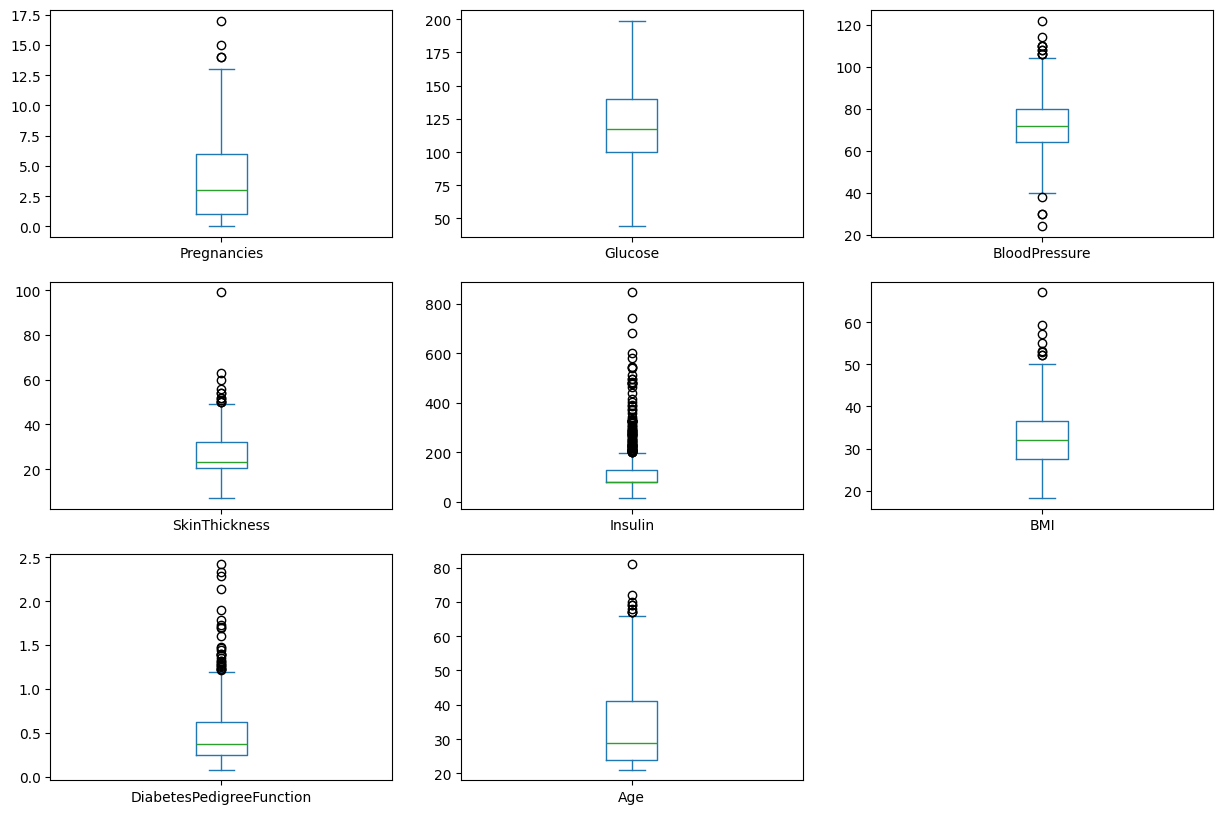

In [10]:
# Построим boxplot для всех признаков
df.drop('Outcome', axis=1).plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.show()

Стоит убрать некоторые строки, похоже на выбросы

In [36]:
df[df['Pregnancies'] > 12].groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,13.000000,117.200000,74.400000,30.214583,97.879688,33.280000,0.405600,46.800000
1,13.888889,138.111111,79.678385,28.067708,92.888600,36.866667,0.466556,42.777778


In [40]:
df[df['BloodPressure'] < 40]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0


In [46]:
df[df['Insulin'] > 500]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
286,5,155.0,84.0,44.0,545.0,38.7,0.619,34,0
409,1,172.0,68.0,49.0,579.0,42.4,0.702,28,1
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


In [54]:
# удаление выбрсоов
mask = (
    (df['Pregnancies'] > 12) |
    (df['BloodPressure'] < 40) |
    (df['SkinThickness'] > 80) |
    (df['Insulin'] > 600) 
)

df_filtered = df[~mask]

### Матрица корреляций

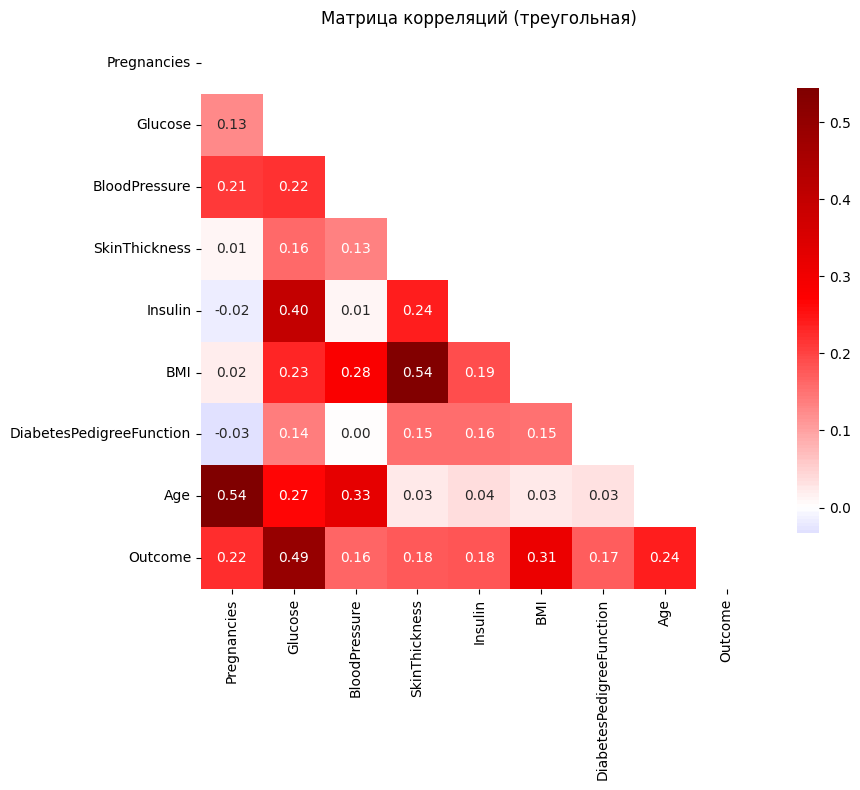

In [65]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

# Маска для скрытия верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            cmap='seismic',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляций (треугольная)')
plt.tight_layout()
plt.show()

Нет признаков, которые плохо коррелируют с целевой переменной. \
Нет признаков, которые сильно коррелируют между друг другом.

### Масштабирование данных

Нужно провести стандартизацию данных, так как признаки имеют разный масштаб. \
Именно стандратизацаия, а не масштабирование, так как есть выбросы.

## Feature Engineering

In [12]:
df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1e-5)

In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_Insulin_Ratio
Outcome,,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000,1.307037
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164,1.387000


Будет реализована создание новых признаков на основе медицинских знаний.